# Contents

## 01 Create a correlation matrix heatmap (colored).
## 02 Scatterplot
## 03 Pairplott
## 04 Catergorical Plot
## 05 Hypothesis Exploration

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define the folder path as a string
path = r'/Users/pamnouboussi/22.06.23 Achiev 6'

In [3]:
# Read the CSV file into a DataFrame and set the index column
air_quality = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'air_quality_cleaned.csv'), index_col=0)

In [4]:
# Check the matplotlib version

matplotlib.__version__

'3.5.1'

In [5]:
air_quality.head()

,Region,Country,City/Town,Year,Number and type of monitoring stations,PM2.5 Annual mean cleaned,PM10 Annual mean cleaned
0,Europe (LMIC),Albania,Korce,2015,1 Suburban-Background,30.0,45.0
1,Europe (LMIC),Albania,Korce,2016,1 Suburban-Background,29.0,40.0
2,Europe (LMIC),Albania,Tirana,2013,"1 station, traffic, urban",16.0,32.0
3,Europe (LMIC),Albania,Vlore,2014,1 Urban-Background,10.0,15.0
4,Europe (LMIC),Albania,Vlore,2015,1 Urban-Background,13.0,19.0


## 01 Create a correlation matrix heatmap (colored).
- Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [6]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11962 entries, 0 to 11961
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Region                                  11962 non-null  object 
 1   Country                                 11962 non-null  object 
 2   City/Town                               11962 non-null  object 
 3   Year                                    11962 non-null  int64  
 4   Number and type of monitoring stations  11894 non-null  object 
 5   PM2.5 Annual mean cleaned               11962 non-null  float64
 6   PM10 Annual mean cleaned                11962 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 747.6+ KB


In [7]:
#Creating new table to store number of monitoring stations
air_quality['Number of monitoring stations'] = air_quality['Number and type of monitoring stations'].str.replace(r'\D', '', regex=True)

In [8]:
air_quality.head()

,Region,Country,City/Town,Year,Number and type of monitoring stations,PM2.5 Annual mean cleaned,PM10 Annual mean cleaned,Number of monitoring stations
0,Europe (LMIC),Albania,Korce,2015,1 Suburban-Background,30.0,45.0,1
1,Europe (LMIC),Albania,Korce,2016,1 Suburban-Background,29.0,40.0,1
2,Europe (LMIC),Albania,Tirana,2013,"1 station, traffic, urban",16.0,32.0,1
3,Europe (LMIC),Albania,Vlore,2014,1 Urban-Background,10.0,15.0,1
4,Europe (LMIC),Albania,Vlore,2015,1 Urban-Background,13.0,19.0,1


In [19]:

# convert values to numeric
# errors='coerce' set values that cant be converted to NAN
non_numeric_values = pd.to_numeric(air_quality['Number of monitoring stations'], errors='coerce').isna()

# create new df (non_numeric_data) containing only the rows from the air_quality
non_numeric_data = air_quality[non_numeric_values]

# View the non-numeric values
non_numeric_data

,Region,Country,City/Town,Year,Number and type of monitoring stations,PM2.5 Annual mean cleaned,PM10 Annual mean cleaned,Number of monitoring stations
11,Europe (HIC),Andorra,Escaldes-Engordany,2017,NaN,10.0,19.0,NaN
68,Western Pacific (HIC),Australia,Canberra,2010,NaN,7.0,11.0,NaN
69,Western Pacific (HIC),Australia,Canberra,2011,NaN,6.0,10.0,NaN
70,Western Pacific (HIC),Australia,Canberra,2012,NaN,7.0,10.0,NaN
71,Western Pacific (HIC),Australia,Canberra,2013,NaN,7.0,10.0,NaN
...,...,...,...,...,...,...,...,...
11896,Americas (HIC),United States of America,Wheeling,2014,-,10.0,19.0,NaN
11897,Americas (HIC),United States of America,Wichita,2014,-,9.0,17.0,NaN
11907,Americas (HIC),United States of America,Winchester,2014,-,9.0,17.0,NaN
11919,Americas (HIC),United States of America,Youngstown-Warren-Boardman,2014,-,11.0,20.0,NaN


In [25]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11962 entries, 0 to 11961
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Region                                  11962 non-null  object 
 1   Country                                 11962 non-null  object 
 2   City/Town                               11962 non-null  object 
 3   Year                                    11962 non-null  int64  
 4   Number and type of monitoring stations  11894 non-null  object 
 5   PM2.5 Annual mean cleaned               11962 non-null  float64
 6   PM10 Annual mean cleaned                11962 non-null  float64
 7   Number of monitoring stations           11546 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


In [12]:
# create corelation matrix of collums
correlation_matrix = air_quality[['PM2.5 Annual mean cleaned', 'PM10 Annual mean cleaned', 'Region', 'Country', 'City/Town', 'Year', 'Number and type of monitoring stations','Number of monitoring stations']].corr()

# Print the correlation matrix
correlation_matrix


,PM2.5 Annual mean cleaned,PM10 Annual mean cleaned,Year,Number of monitoring stations
PM2.5 Annual mean cleaned,1.000000,0.937782,-0.064853,0.010981
PM10 Annual mean cleaned,0.937782,1.000000,-0.087627,0.015486
Year,-0.064853,-0.087627,1.000000,0.000168
Number of monitoring stations,0.010981,0.015486,0.000168,1.000000


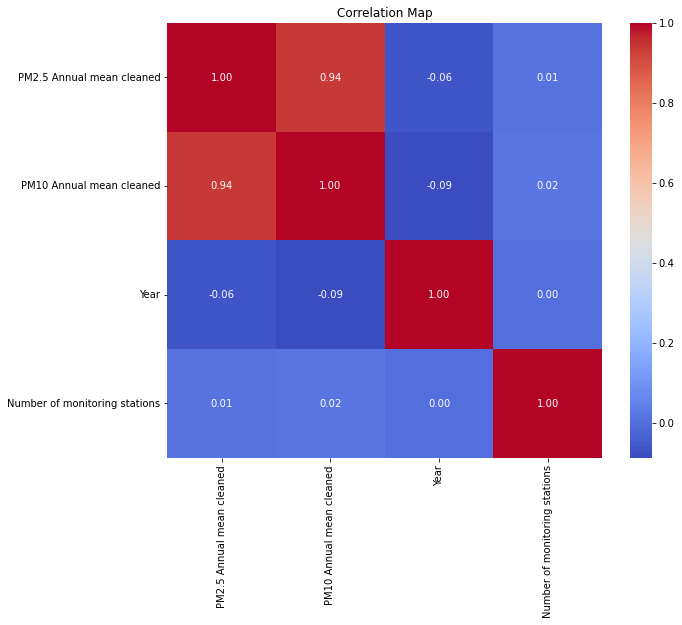

In [13]:
#Plot correlation Matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set the title and display the plot
plt.title('Correlation Map')
plt.show()


- The correlation coeficient of 0.94 indicates a strong positive linear relationship between the two variables . 
- the other plots show a verry weak positive and negative relationship.

## 02 Scatterplot
Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.

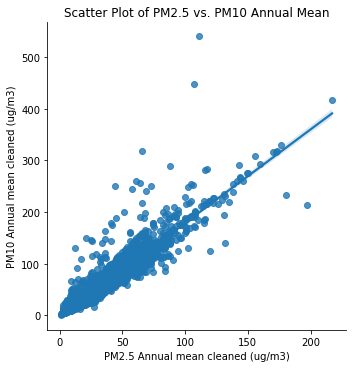

In [26]:

#Creating scatterplot of PM10/PM2.5 relationship
#defining the axis
sns.lmplot(x = 'PM2.5 Annual mean cleaned', y = 'PM10 Annual mean cleaned', data = air_quality)

# Set the plot title and axis labels
plt.title('Scatter Plot of PM2.5 vs. PM10 Annual Mean')
plt.xlabel('PM2.5 Annual mean cleaned (ug/m3)')
plt.ylabel('PM10 Annual mean cleaned (ug/m3)')

# Display the scatter plot
plt.show()


The plot confims the stong possitive relationship between the 2 variables. MOst of the points are close to the trend line. 

## 03 Pairplott
Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

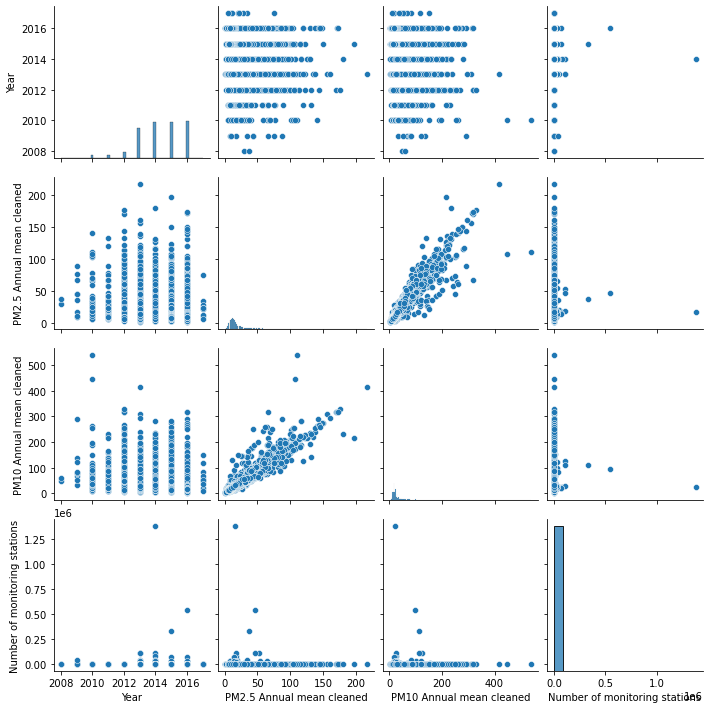

In [15]:

# create pair plot
sns.pairplot(air_quality)


There apear to be a few outliers in the dataset, however most points fall within the datasets. There only apears to be a relationship between 2 variables in my data. the PM2.5 and PM10 annual means

## 04 Catergorical Plot
Create a categorical plot and interpret the results.

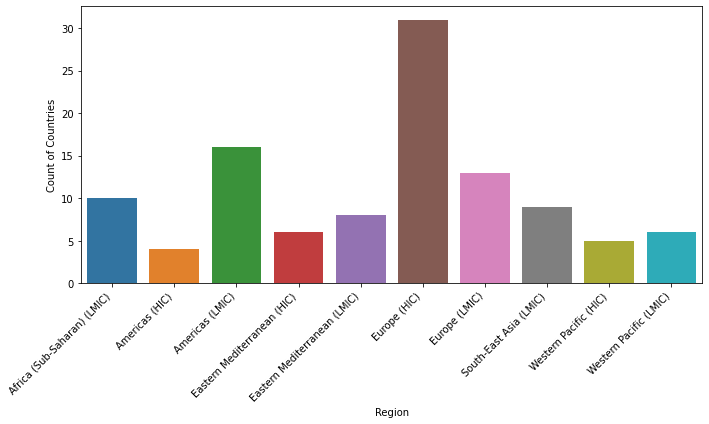

In [29]:

# bar graph with the categorical "Region" and "Country" to find out how many countries were in each defined region

# Adjust graph size
plt.figure(figsize=(10, 6)) 

# Count the number of unique countries per region
country_counts_bar_graph = air_quality.groupby('Region')['Country'].nunique().reset_index()

# Create the count plot
ax = sns.barplot(data=country_counts, x='Region', y='Country')

# Rotate the x-axis labels so they dont overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the y-axis label
ax.set_ylabel('Count of Countries')

# Display the plot
plt.tight_layout()
plt.show()



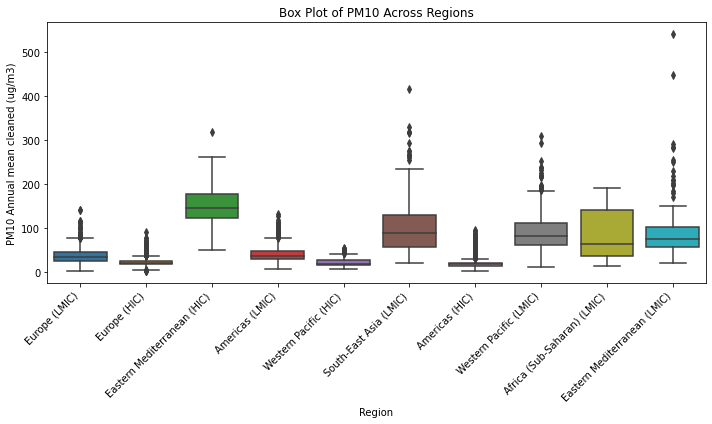

In [30]:
# Adjust the size
plt.figure(figsize=(10, 6))  

# Create the box plot for PM10
ax = sns.boxplot(data=air_quality, x='Region', y='PM10 Annual mean cleaned')
plt.title('Box Plot of PM10 Across Regions')
plt.xlabel('Region')
plt.ylabel('PM10 Annual mean cleaned (ug/m3)')

# Rotate and align the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


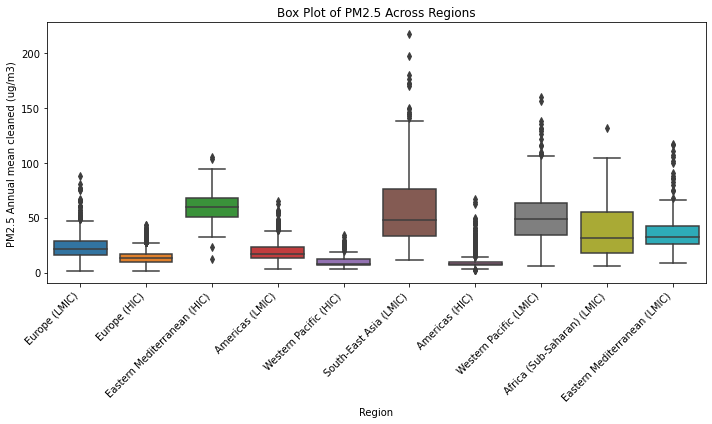

In [32]:
# Adjust the size
plt.figure(figsize=(10, 6))  

# Create the box plot for PM2.5
ax = sns.boxplot(data=air_quality, x='Region', y='PM2.5 Annual mean cleaned')
plt.title('Box Plot of PM2.5 Across Regions')
plt.xlabel('Region')
plt.ylabel('PM2.5 Annual mean cleaned (ug/m3)')

# Rotate and align the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()



## 05 Hypothesis Exploration
Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. 
Add any new questions that may have arisen based on the early findings in your visual exploration.

### Are there any notable differences in pollutant levels between different years?

In [35]:
# Calculate average pollutant levels for each year
average_pm10_by_year = air_quality.groupby('Year')['PM10 Annual mean cleaned'].mean()
average_pm25_by_year = air_quality.groupby('Year')['PM2.5 Annual mean cleaned'].mean()

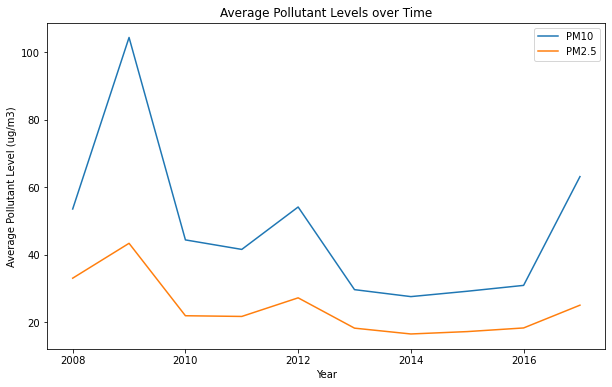

In [37]:
# Create a line plot

# change size
plt.figure(figsize=(10, 6))


plt.plot(average_pm10_by_year.index, average_pm10_by_year.values, label='PM10')
plt.plot(average_pm25_by_year.index, average_pm25_by_year.values, label='PM2.5')

# label the plot
plt.xlabel('Year')
plt.ylabel('Average Pollutant Level (ug/m3)')
plt.title('Average Pollutant Levels over Time')
plt.legend()

Polutant levels seems to have decrease from the years 2010, beofre rising and decreasing again. In 2016 they began to increase once more. Both polutant levels apear to follow a similar trend. they rise and fall at around the same time. 

### 3.	Are there any specific regions, countries, or cities/towns that consistently exceed the permissible pollutant levels? Can the dataset be used to assess compliance with air quality standards or guidelines set by regulatory bodies?

In [38]:
# Defining the permissible WHO pollutant levels
pm10_threshold = 20  # Permissible PM10 level in ug/m3
pm25_threshold = 10  # Permissible PM2.5 level in ug/m3

In [40]:
# Group the data by region, country, or city/town and calculate the average pollutant levels
PM_grouped_data = air_quality.groupby(['Region', 'Country', 'City/Town']).mean()

In [43]:
# Identify regions, countries, or cities/towns that consistently exceed the thresholds
exceeding_pm10 = PM_grouped_data[PM_grouped_data['PM10 Annual mean cleaned'] > pm10_threshold]
exceeding_pm25 = PM_grouped_data[PM_grouped_data['PM2.5 Annual mean cleaned'] > pm25_threshold]

In [44]:
exceeding_pm10

Year  \
Region                      Country     City/Town                  
Africa (Sub-Saharan) (LMIC) Cameroon    Bafoussam         2012.0   
                                        Bamenda           2012.0   
                                        Yaoude            2012.0   
                            Ghana       Accra             2014.0   
                            Kenya       Nairobi           2009.0   
...                                                          ...   
Western Pacific (LMIC)      Philippines Zamboanga City    2013.0   
                            Viet Nam    Ha Long           2014.5   
                                        Ha Noi            2013.5   
                                        Ho Chi Minh City  2016.0   
                                        Viet Tri          2013.5   

                                                          PM2.5 Annual mean cleaned  \
Region                      Country     City/Town                                     
Africa (Sub-Saharan) (LMIC) Cameroon    Bafoussam                         67.000000   
                                        Bamenda                          132.000000   
                                        Yaoude                            49.000000   
                            Ghana       Accra                             81.000000   
                            Kenya       Nairobi                           17.000000   
...                                                                             ...   
Western Pacific (LMIC)      Philippines Zamboanga City                    26.000000   
                            Viet Nam    Ha Long                           22.000000   
                                        Ha Noi                            26.666667   
                                        Ho Chi Minh City                  42.000000   
                                        Viet Tri                          11.500000   

                                                          PM10 Annual mean cleaned  \
Region                      Country     City/Town                                    
Africa (Sub-Saharan) (LMIC) Cameroon    Bafoussam                            105.0   
                                        Bamenda                              141.0   
                                        Yaoude                                65.0   
                            Ghana       Accra                                165.4   
                            Kenya       Nairobi                               33.0   
...                                                                            ...   
Western Pacific (LMIC)      Philippines Zamboanga City                        48.0   
                            Viet Nam    Ha Long                               47.5   
                                        Ha Noi                                56.5   
                                        Ho Chi Minh City                      90.0   
                                        Viet Tri                              24.5   

                                                          Number of monitoring stations  
Region                      Country     City/Town                                        
Africa (Sub-Saharan) (LMIC) Cameroon    Bafoussam                                  1.00  
                                        Bamenda                                    1.00  
                                        Yaoude                                     1.00  
                            Ghana       Accra                                      6.25  
                            Kenya       Nairobi                                     NaN  
...                                                                                 ...  
Western Pacific (LMIC)      Philippines Zamboanga City                             2.00  
                            Viet Nam    Ha Long                                    1.00  
                        

In [45]:
exceeding_pm25

Year  \
Region                      Country     City/Town                  
Africa (Sub-Saharan) (LMIC) Cameroon    Bafoussam         2012.0   
                                        Bamenda           2012.0   
                                        Yaoude            2012.0   
                            Ghana       Accra             2014.0   
                            Kenya       Nairobi           2009.0   
...                                                          ...   
Western Pacific (LMIC)      Philippines Zamboanga City    2013.0   
                            Viet Nam    Ha Long           2014.5   
                                        Ha Noi            2013.5   
                                        Ho Chi Minh City  2016.0   
                                        Viet Tri          2013.5   

                                                          PM2.5 Annual mean cleaned  \
Region                      Country     City/Town                                     
Africa (Sub-Saharan) (LMIC) Cameroon    Bafoussam                         67.000000   
                                        Bamenda                          132.000000   
                                        Yaoude                            49.000000   
                            Ghana       Accra                             81.000000   
                            Kenya       Nairobi                           17.000000   
...                                                                             ...   
Western Pacific (LMIC)      Philippines Zamboanga City                    26.000000   
                            Viet Nam    Ha Long                           22.000000   
                                        Ha Noi                            26.666667   
                                        Ho Chi Minh City                  42.000000   
                                        Viet Tri                          11.500000   

                                                          PM10 Annual mean cleaned  \
Region                      Country     City/Town                                    
Africa (Sub-Saharan) (LMIC) Cameroon    Bafoussam                            105.0   
                                        Bamenda                              141.0   
                                        Yaoude                                65.0   
                            Ghana       Accra                                165.4   
                            Kenya       Nairobi                               33.0   
...                                                                            ...   
Western Pacific (LMIC)      Philippines Zamboanga City                        48.0   
                            Viet Nam    Ha Long                               47.5   
                                        Ha Noi                                56.5   
                                        Ho Chi Minh City                      90.0   
                                        Viet Tri                              24.5   

                                                          Number of monitoring stations  
Region                      Country     City/Town                                        
Africa (Sub-Saharan) (LMIC) Cameroon    Bafoussam                                  1.00  
                                        Bamenda                                    1.00  
                                        Yaoude                                     1.00  
                            Ghana       Accra                                      6.25  
                            Kenya       Nairobi                                     NaN  
...                                                                                 ...  
Western Pacific (LMIC)      Philippines Zamboanga City                             2.00  
                            Viet Nam    Ha Long                                    1.00  
                        

#### - Africa and the western pacific are the regions with the worst air quality:

# Questions to be investigated:

#### 1.	How does the annual mean pollutant level (ug/m3) vary across different regions, countries, or cities/towns? Which regions, countries, or cities/towns have consistently high or low annual mean pollutant levels?

South esat asia and the western pasific have the highest number of polutants. European regions and the americas have the lowest

#### 2.	Are there any notable differences in pollutant levels between different years?

#### 3.	Are there any specific regions, countries, or cities/towns that consistently exceed the permissible pollutant levels? Can the dataset be used to assess compliance with air quality standards or guidelines set by regulatory bodies?

#### 4.	Is there any relationship between the number of monitoring stations and the observed pollutant levels?
THere is no relationship between the number of motioring stations and the obserbed polutant levels. though I would need to investigate this a little further to be sure. 


## Define any hypotheses that you can at this point. You’ll be testing these later on.
- Hypothesis: There is a correlation between PM2.5 and PM10 pollutant levels.

Investigate the correlation between PM2.5 and PM10 pollutant levels to determine if there is a significant relationship between them. A strong positive correlation may indicate that an increase in one pollutant is associated with an increase in the other.

- Hypothesis: There are significant differences in pollutant levels between different years.

You can compare the mean pollutant levels across different years and perform statistical tests to determine if there are significant differences. This can help identify whether pollutant levels have changed over time.

- Hypothesis: The annual mean PM10 levels vary significantly between different regions or countries.

In [46]:
# export updated df
air_quality.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'air_quality_cleaned_updated.csv'))